# Computational Fluid Dynamics in Python

( Using finite differences method )
## 1-D Flows

### 1-D Linear Convection

The one-dimensional Linear Convection equation is:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

which leads to the discrete equation:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$

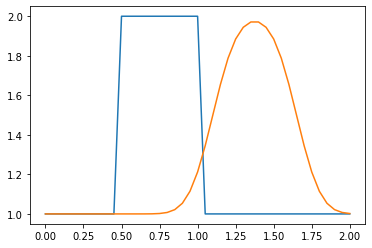

In [3]:
%matplotlib inline
import numpy as np                
import matplotlib.pyplot as plt 
import time, sys                

nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2./(nx-1)
nt = 25    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)
c = 1.      #assume wavespeed of c = 1

u = np.ones(nx)      #numpy function ones()
u[int(.5/dx) : int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
#print u

plt.plot(np.linspace(0,2,nx), u)
#plt.show()

un = np.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
	un = u.copy() ##copy the existing values of u into un
	for i in range(1,nx):
		u[i] = un[i]-c*dt/dx*(un[i]-un[i-1])  ## Linear Convection
		#u[i] = un[i]-un[i]*dt/dx*(un[i]-un[i-1])	## Non Linear Convection

plt.plot(np.linspace(0,2,nx),u)
plt.show()

### 1-D Diffusion

The one-dimensional diffusion equation is:

$$\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}$$

which leads to the discrete equation:

$$\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}$$

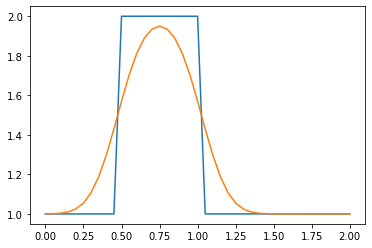

In [4]:
nx = 41
dx = 2./(nx-1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma*dx**2/nu #dt is defined using sigma ... more later!


u = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5/dx) : int(1/dx+1)]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0,2,nx), u)

un = np.ones(nx) #our placeholder array, un, to advance the solution in time

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1,nx-1):
        u[i] = un[i] + nu*dt/dx**2*(un[i+1]-2*un[i]+un[i-1])
        
plt.plot(np.linspace(0,2,nx), u)
plt.show()

## 2-D Flows

### 2-D Linear Convection

The one-dimensional Linear Convection equation is:

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

which leads to the discrete equation:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

C:\Users\prate\AppData\Local\Temp/ipykernel_16880/741193226.py:25: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


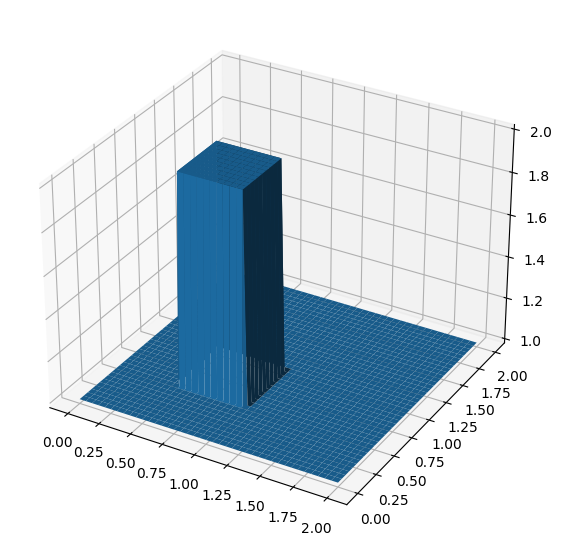

C:\Users\prate\AppData\Local\Temp/ipykernel_16880/741193226.py:49: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


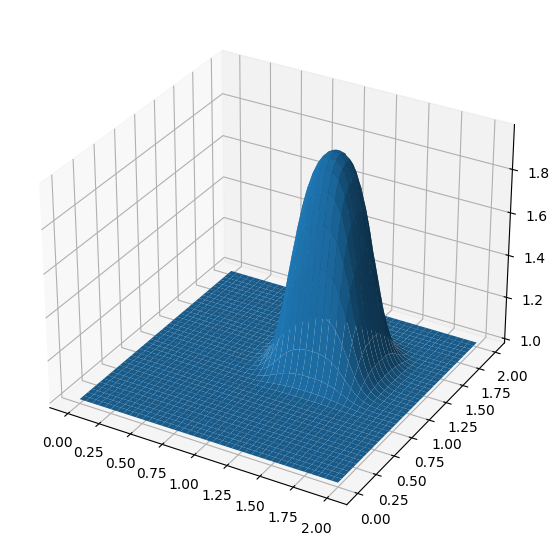

In [8]:
from mpl_toolkits.mplot3d import Axes3D    # required for projected 3d plots

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
un = np.ones((ny,nx)) ##

###Assign initial conditions

u[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)] = 2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

###Plot Initial Condition
fig = plt.figure(figsize=(11,7), dpi=100)          ##the figsize parameter can be used to produce different sized images
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x,y)                            
surf = ax.plot_surface(X,Y,u[:])

plt.show()

for n in range(nt+1): ##loop across number of time steps
#    un = u.copy()
#    for i in range(1, len(u)):
#        for j in range(1, len(u)):
#            u[i,j] = un[i, j] - (c*dt/dx*(un[i,j] - un[i-1,j]))-(c*dt/dy*(un[i,j]-un[i,j-1]))
#            u[0,:] = 1
#            u[-1,:] = 1
#            u[:,0] = 1
#            u[:,-1] = 1
## is equivalent to:
    un[:] = u[:]
    u[1:,1:]=un[1:,1:]-(c*dt/dx*(un[1:,1:]-un[0:-1,1:]))-(c*dt/dy*(un[1:,1:]-un[1:,0:-1]))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1			
fig = plt.figure()
ax = fig.add_subplot(projection='3d')			
# fig = plt.figure(figsize=(11,7), dpi=100)
# ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X,Y,u[:])

plt.show()

### 2-D Non Linear Convection

2D Convection is represented by the pair of coupled partial differential equations below:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$
$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations using the methods we've applied previously yields:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$
$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

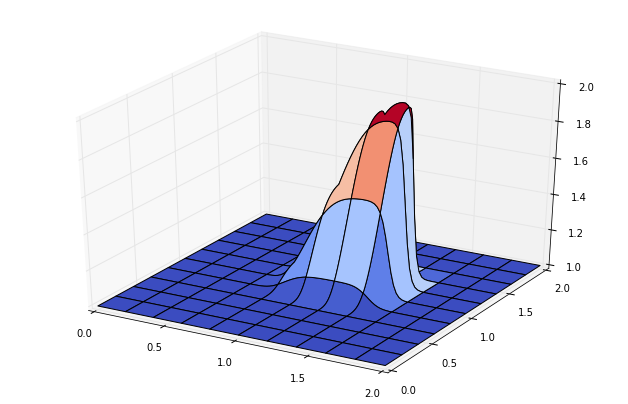

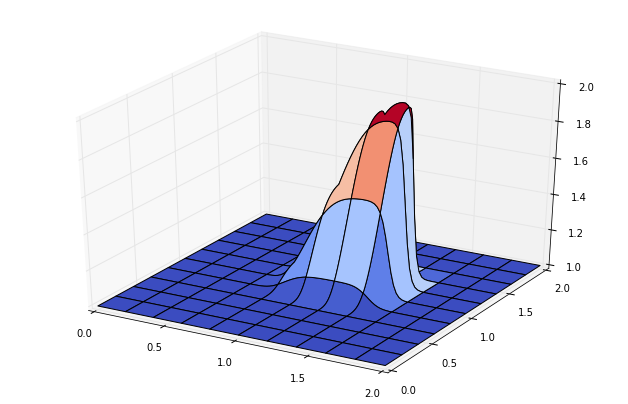

In [ ]:
from mpl_toolkits.mplot3d import Axes3D   # required for projected 3d plots

###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
v = np.ones((ny,nx))
un = np.ones((ny,nx))
vn = np.ones((ny,nx))

###Assign initial conditions

u[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)]=2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

for n in range(nt+1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()

    u[1:,1:]=un[1:,1:]-(un[1:,1:]*dt/dx*(un[1:,1:]-un[0:-1,1:]))-vn[1:,1:]*dt/dy*(un[1:,1:]-un[1:,0:-1]) 
    v[1:,1:]=vn[1:,1:]-(un[1:,1:]*dt/dx*(vn[1:,1:]-vn[0:-1,1:]))-vn[1:,1:]*dt/dy*(vn[1:,1:]-vn[1:,0:-1])
    
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1
    
    v[0,:] = 1
    v[-1,:] = 1
    v[:,0] = 1
    v[:,-1] = 1
	
from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,u, cmap=cm.coolwarm)

plt.show()

from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,v, cmap=cm.coolwarm)

plt.show()

### 2-D Diffusion

The 2D-diffusion equation is:

$$\frac{\partial u}{\partial t} = \nu \frac{\partial ^2 u}{\partial x^2} + \nu \frac{\partial ^2 u}{\partial y^2}$$

which leads to the discrete equation:

$$\frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} = \nu \frac{u_{i+1,j}^n - 2 u_{i,j}^n + u_{i-1,j}^n}{\Delta x^2} + \nu \frac{u_{i,j+1}^n-2 u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2}$$

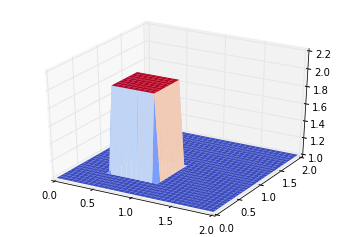

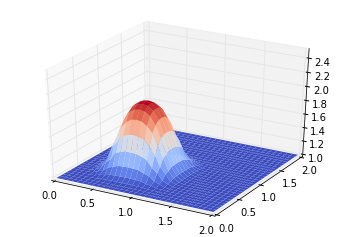

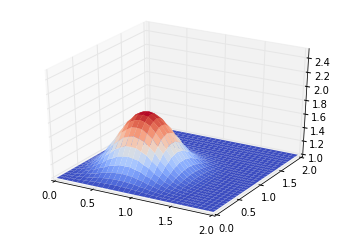

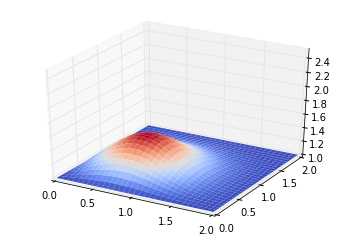

In [ ]:
from mpl_toolkits.mplot3d import Axes3D ##library for 3d projection plots
from matplotlib import cm ##cm = "colormap" for changing the 3d plot color palette

###variable declarations
nx = 31
ny = 31
nt = 17
nu=.05
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .25
dt = sigma*dx*dy/nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
un = np.ones((ny,nx)) ##

###Assign initial conditions
u[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)] = 2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
## and display IC
fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
plt.show()
ax.set_xlim(1,2)
ax.set_ylim(1,2)
ax.set_zlim(1,2.5)
#ax.zaxis.set_major_locator(LinearLocator(5))	
	
def plot2D(x, y, u):    ## non used here
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(x,y)
    surf = ax.plot_surface( X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax.set_xlim(0,2)
    ax.set_ylim(0,1)
    ax.view_init(30,225)	
	
	
def diffuse(nt):      ###Run through nt timesteps
    u[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)] = 2
    
    for n in range(nt+1): 
        un = u.copy()
        u[1:-1,1:-1]=un[1:-1,1:-1]+nu*dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+nu*dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])
        u[0,:]=1
        u[-1,:]=1
        u[:,0]=1
        u[:,-1]=1
		
	## and display u
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    ax.set_zlim(1,2.5)
    plt.show()
	
diffuse(5)
diffuse(15)
diffuse(50)

### 2-D Non Linear Convection with Diffusion

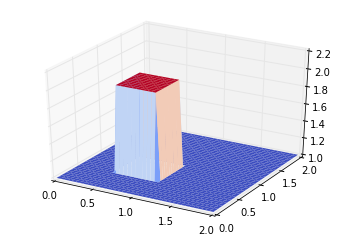

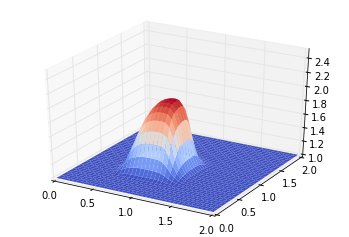

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


###variable declarations
nx = 41
ny = 41
nt = 120
c = 1
dx = 2.0/(nx-1)
dy = 2.0/(ny-1)
sigma = .0009
nu = 0.01
dt = sigma*dx*dy/nu


x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((ny,nx)) ##create a 1xn vector of 1's
v = np.ones((ny,nx))
un = np.ones((ny,nx)) ##
vn = np.ones((ny,nx))
comb = np.ones((ny,nx))

###Assign initial conditions

u[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)] = 2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5/dy) : int(1/dy+1), int(.5/dx) : int(1/dx+1)] = 2 ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2

###(plot ICs)
#fig = plt.figure(figsize=(11,7), dpi=100)
#ax = fig.gca(projection='3d')
#X,Y = np.meshgrid(x,y)
#wire1 = ax.plot_wireframe(X,Y,u[:], cmap=cm.coolwarm)
#wire2 = ax.plot_wireframe(X,Y,v[:], cmap=cm.coolwarm)
#ax.set_xlim(1,2)
#ax.set_ylim(1,2)
#ax.set_zlim(1,5)
#plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(x,y)
surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
plt.show()
ax.set_xlim(1,2)
ax.set_ylim(1,2)
ax.set_zlim(1,5)

def burgers(nt):      ###Run through nt timesteps
	for n in range(nt+1): ##loop across number of time steps
		un = u.copy()
		vn = v.copy()

		u[1:-1,1:-1] = un[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(un[1:-1,1:-1]-un[0:-2,1:-1])-dt/dy*vn[1:-1,1:-1]* \
                   (un[1:-1,1:-1]-un[1:-1,0:-2])+nu*dt/dx**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+un[0:-2,1:-1])+ \
                   nu*dt/dy**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2])
    
		v[1:-1,1:-1] = vn[1:-1,1:-1] - dt/dx*un[1:-1,1:-1]*(vn[1:-1,1:-1]-vn[0:-2,1:-1])-dt/dy*vn[1:-1,1:-1]* \
                   (vn[1:-1,1:-1]-vn[1:-1,0:-2])+nu*dt/dx**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[0:-2,1:-1])+ \
                   nu*dt/dy**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2])
     
		u[0,:] = 1
		u[-1,:] = 1
		u[:,0] = 1
		u[:,-1] = 1
    
		v[0,:] = 1
		v[-1,:] = 1
		v[:,0] = 1
		v[:,-1] = 1

burgers(400)
		
#fig = plt.figure(figsize=(11,7), dpi=100)
#ax = fig.gca(projection='3d')
#X,Y = np.meshgrid(x,y)
#wire1 = ax.plot_wireframe(X,Y,u[:])
#wire2 = ax.plot_wireframe(X,Y,v[:])
#ax.set_xlim(1,2)
#ax.set_ylim(1,2)
#ax.set_zlim(1,5)
#plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_zlim(1,2.5)
plt.show()